<a href="https://colab.research.google.com/github/CoderShad/FIN-ADV-AI/blob/main/Copy_of_C08_Regex_WebScrape_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regex practice

1. NL: Matches the exact string "NL".
2. [0-9]{9}: Matches exactly 9 digits (0-9).
3. B: Matches the exact letter "B".
4. [0-9]{2}: Matches exactly 2 digits (0-9).

This pattern below is designed to match strings that start with "NL", followed by 9 digits, then "B", and end with 2 digits (like "NL003028112B01").

The findall function searches through the my_string for all occurrences that match the specified pattern. It returns a list of all the matches it finds. In this case, it will find "NL003028112B01" in the string because it matches the pattern.

The span() method of a match object returns a tuple indicating the start and end positions of the matched substring within my_string.

In [ ]:
import re
pattern = 'NL[0-9]{9}B[0-9]{2}'
my_string = 'ING Bank N.V. BTW:NL003028112B01'
re.findall(pattern,my_string)
match = re.search(pattern,my_string)
match.span()

(18, 32)

# Requests to download webpages

Import the package "request". The requests library is the de facto standard for making HTTP or HTTPS requests in Python.

In [ ]:
import requests
import pandas as pd

Get the content from the web address listed and store the content in "amazon10k2019".



This website contains the 10k filing of Amazon com for year 2019.

In [ ]:
amazon10k2019=requests.get('https://www.sec.gov/Archives/edgar/data/1018724/000101872420000004/0001018724-20-000004.txt', headers={'User-Agent': 'Mozilla/5.0'}).text
print(amazon10k2019)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<title>SEC.gov | Request Rate Threshold Exceeded</title>
<style>
html {height: 100%}
body {height: 100%; margin:0; padding:0;}
#header {background-color:#003968; color:#fff; padding:15px 20px 10px 20px;font-family:Arial, Helvetica, sans-serif; font-size:20px; border-bottom:solid 5px #000;}
#footer {background-color:#003968; color:#fff; padding:15px 20px;font-family:Arial, Helvetica, sans-serif; font-size:20px;}
#content {max-width:650px;margin:60px auto; padding:0 20px 100px 20px; background-image:url(seal_bw.png);background-repeat:no-repeat;background-position:50% 100%;}
h1 {font-family:Georgia, Times, serif; font-size:20px;}
h2 {text-align:center; font-family:Georgia, Times, serif; font-size:20px; width:100%; border-bottom:solid #999 1px;padding



---

# Parse HTML Code With Beautiful Soup

You’ve successfully scraped some HTML from the internet, but when you look at it, it looks like a mess. There are tons of HTML elements here and there, thousands of attributes scattered around—and maybe there’s some JavaScript mixed in as well? It’s time to parse this lengthy code response with the help of Python to make it more accessible so you can pick out the data that you want.

Beautiful Soup is a Python library for parsing structured data. It allows you to interact with HTML in a similar way to how you interact with a web page using developer tools. The library exposes intuitive methods that you can use to explore the HTML you received.

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
soup = BeautifulSoup(amazon10k2019, "html.parser")

# Remove unwanted tags like <script> and <style>
for tag in soup(["script", "style"]):
    tag.decompose()

# Extract cleaned text
cleaned_text = soup.get_text()

# Remove extra whitespaces
cleaned_text = " ".join(cleaned_text.split())

# Print the cleaned text
print(cleaned_text)

SEC.gov | Request Rate Threshold Exceeded U.S. Securities and Exchange Commission Your Request Originates from an Undeclared Automated Tool To allow for equitable access to all users, SEC reserves the right to limit requests originating from undeclared automated tools. Your request has been identified as part of a network of automated tools outside of the acceptable policy and will be managed until action is taken to declare your traffic. Please declare your traffic by updating your user agent to include company specific information. For best practices on efficiently downloading information from SEC.gov, including the latest EDGAR filings, visit sec.gov/developer. You can also sign up for email updates on the SEC open data program, including best practices that make it more efficient to download data, and SEC.gov enhancements that may impact scripted downloading processes. For more information, contact opendata@sec.gov. For more information, please see the SECâs Web Site Privacy and 



---

# Sentiment Analysis

Here we define a list of words that are associated with "positive". These words are taken from Loughran and McDonald (2011) financial sentiment dictionary. This dictionary provides the list of words in six categories (negative, positive, uncertainty, litigious, strong modal, and weak modal) (https://sraf.nd.edu/loughranmcdonald-master-dictionary/).

In [ ]:
lm_dict = pd.read_csv('https://raw.githubusercontent.com/mjha91/data/main/fi8092/LMdict.csv')
lm_dict = lm_dict[lm_dict['Positive'] > 0]
print(lm_dict.head())

           Word  Seq_num  Word Count  Word Proportion  Average Proportion  \
125        ABLE      126     5479229     2.218970e-04        2.110400e-04   
336   ABUNDANCE      337        9622     3.900000e-07        3.770000e-07   
338    ABUNDANT      339       14106     5.710000e-07        5.220000e-07   
438   ACCLAIMED      439        2544     1.030000e-07        9.390000e-08   
477  ACCOMPLISH      478      204431     8.280000e-06        8.650000e-06   

      Std Dev  Doc Count  Negative  Positive  Uncertainty  Litigious  \
125  0.000301     770628         0      2009            0          0   
336  0.000009       7425         0      2009            0          0   
338  0.000009      10145         0      2009            0          0   
438  0.000003       1876         0      2009            0          0   
477  0.000042     136954         0      2009            0          0   

     Strong_Modal  Weak_Modal  Constraining  Complexity  Syllables     Source  
125             0       

In [ ]:
words = lm_dict['Word'].to_list()
print(words)
print(len(words))

['ABLE', 'ABUNDANCE', 'ABUNDANT', 'ACCLAIMED', 'ACCOMPLISH', 'ACCOMPLISHED', 'ACCOMPLISHES', 'ACCOMPLISHING', 'ACCOMPLISHMENT', 'ACCOMPLISHMENTS', 'ACHIEVE', 'ACHIEVED', 'ACHIEVEMENT', 'ACHIEVEMENTS', 'ACHIEVES', 'ACHIEVING', 'ADEQUATELY', 'ADVANCEMENT', 'ADVANCEMENTS', 'ADVANCES', 'ADVANCING', 'ADVANTAGE', 'ADVANTAGED', 'ADVANTAGEOUS', 'ADVANTAGEOUSLY', 'ADVANTAGES', 'ALLIANCE', 'ALLIANCES', 'ASSURE', 'ASSURED', 'ASSURES', 'ASSURING', 'ATTAIN', 'ATTAINED', 'ATTAINING', 'ATTAINMENT', 'ATTAINMENTS', 'ATTAINS', 'ATTRACTIVE', 'ATTRACTIVENESS', 'BEAUTIFUL', 'BEAUTIFULLY', 'BENEFICIALLY', 'BENEFITED', 'BENEFITING', 'BENEFITTED', 'BENEFITTING', 'BEST', 'BETTER', 'BOLSTERED', 'BOLSTERING', 'BOLSTERS', 'BOOM', 'BOOMING', 'BOOST', 'BOOSTED', 'BREAKTHROUGH', 'BREAKTHROUGHS', 'BRILLIANT', 'CHARITABLE', 'COLLABORATE', 'COLLABORATED', 'COLLABORATES', 'COLLABORATING', 'COLLABORATION', 'COLLABORATIONS', 'COLLABORATIVE', 'COLLABORATOR', 'COLLABORATORS', 'COMPLIMENT', 'COMPLIMENTARY', 'COMPLIMENTED', '

## Regex matching:

*   re.findall: Finds all matches of the word in the big_string.
*   \b: Ensures the match is a whole word.
*   flags=re.IGNORECASE: Enables case-insensitive matching.



In [ ]:
import re

In [ ]:
# Create DataFrame with words as rows
df = pd.DataFrame(words, columns=['words'])

# Calculate frequency using regex match
df['frequency'] = df['words'].apply(lambda word: len(re.findall(rf'\b{word}\b', cleaned_text, flags=re.IGNORECASE)))

# Display the DataFrame
df = df.sort_values(by='frequency', ascending=False)
print(df)

            words  frequency
111   EFFICIENTLY          2
47           BEST          2
110     EFFICIENT          1
127  ENHANCEMENTS          1
236      PERFECTS          0
..            ...        ...
113     EMPOWERED          0
112       EMPOWER          0
109    EFFICIENCY          0
108  EFFICIENCIES          0
120    ENCOURAGED          0

[347 rows x 2 columns]


## Plot the top words

Bar Chart:
* plt.bar: Creates the bar chart.
* color: Sets the bar color.
* xlabel, ylabel, title: Add labels and a title to the chart.
* xticks, yticks: Adjust the font size of the ticks for better readability.
* plt.show(): Displays the chart.

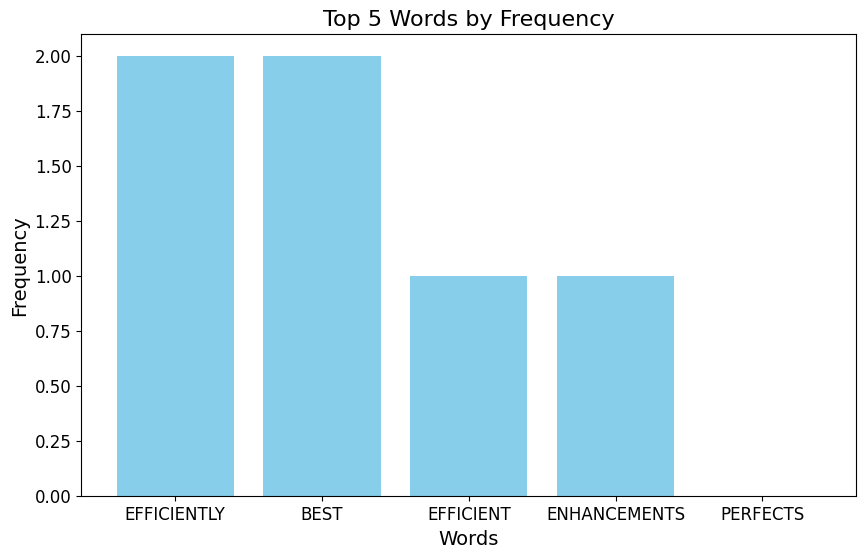

In [ ]:
import matplotlib.pyplot as plt

top_words = df.head(5)

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_words['words'], top_words['frequency'], color='skyblue')
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 5 Words by Frequency', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



---

## Natural Language Toolkit - NO RUN

Key Features of NLTK:
1. Text Processing Tools:
Tokenization: Breaking text into words or sentences.
Stemming: Reducing words to their base or root form.
Lemmatization: Reducing words to their base form with context.
Stopword Removal: Filtering out common words like "and," "the," etc.
Corpus and Dataset Access:

2. Comes with access to several corpora, such as movie reviews, WordNet, and more.

3. Language Modeling: Supports building and training custom language models.
Tools for n-grams, frequency distribution, and probability analysis.

4. Part-of-Speech (POS) Tagging: Assigning grammatical tags like noun, verb, etc., to words.

We wont run in colab since NLTK downloads big files - nltk.download('punkt')

In [ ]:
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.tree import Tree

nltk_text = "The quick brown fox jumps over the lazy dog."

In [ ]:
# Tokenization
tokens = word_tokenize(nltk_text)
print("Tokens:", tokens)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
# Part-of-Speech Tagging
pos_tags = pos_tag(tokens)
print("POS Tags:", pos_tags)

# Named Entity Recognition
def extract_names(pos_tags):
    named_entities = ne_chunk(pos_tags)
    names = []
    for entity in named_entities:
        if isinstance(entity, Tree) and entity.label() in ["PERSON", "ORGANIZATION", "GPE"]:
            name = " ".join(c[0] for c in entity)
            names.append(name)
    return names

names = extract_names(pos_tags)
print("Names:", names)
